In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [27]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [28]:
df['class'] = (df['class'] == 'g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


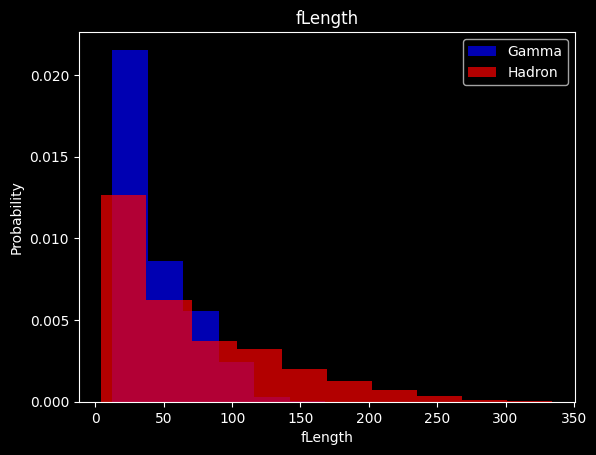

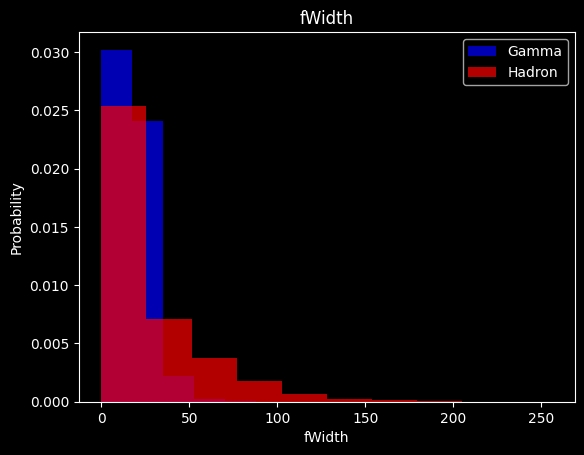

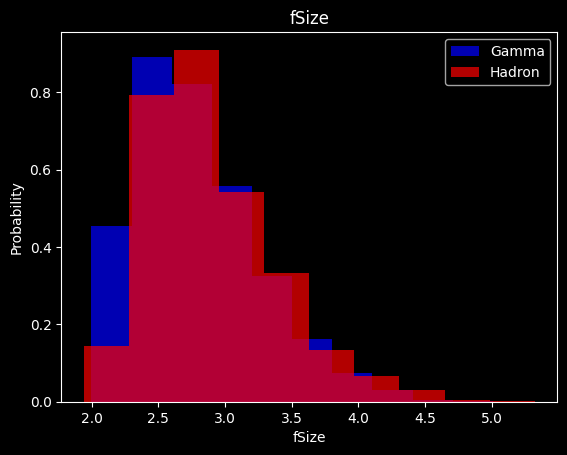

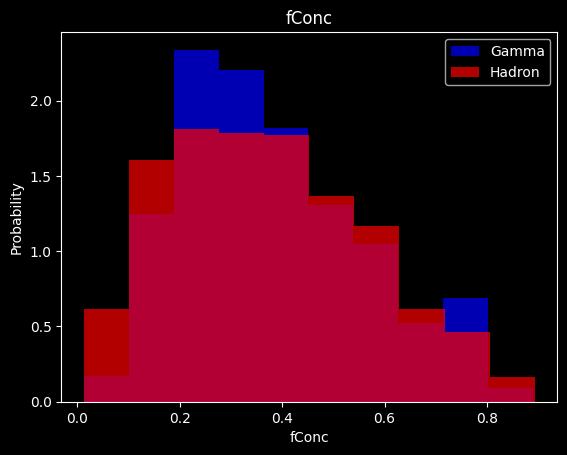

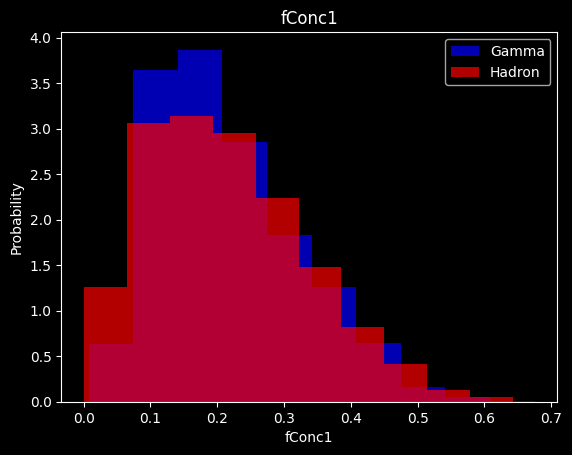

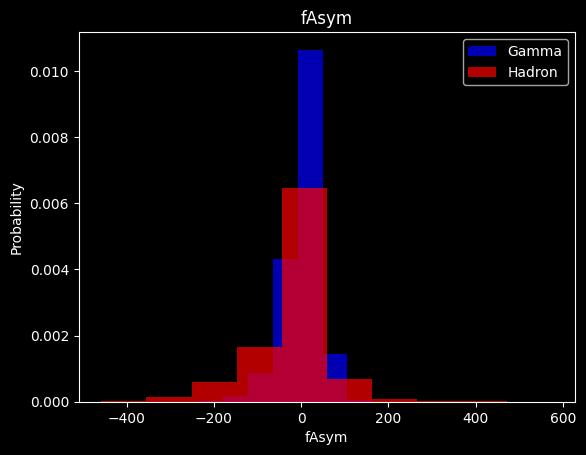

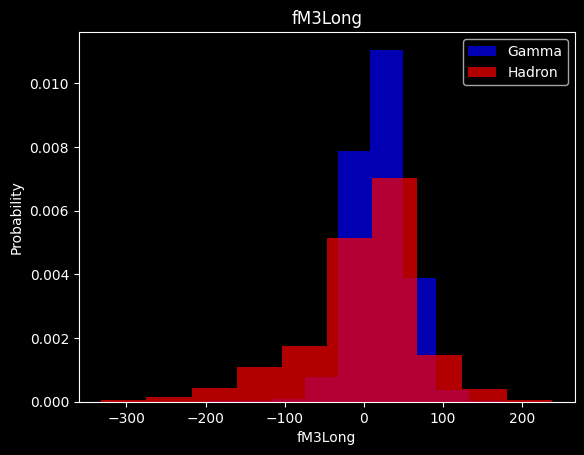

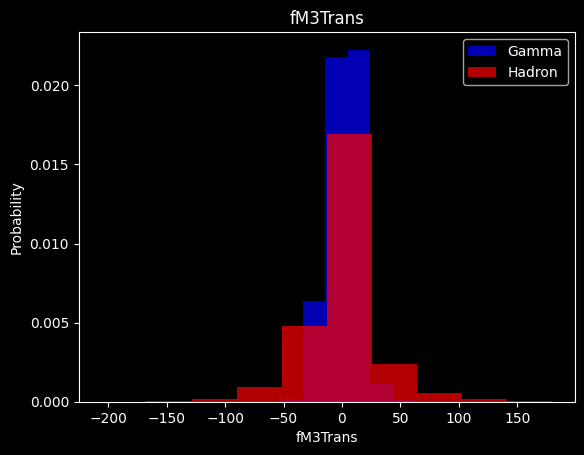

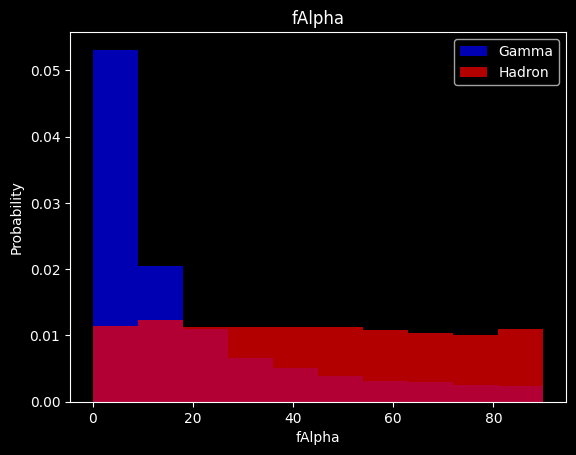

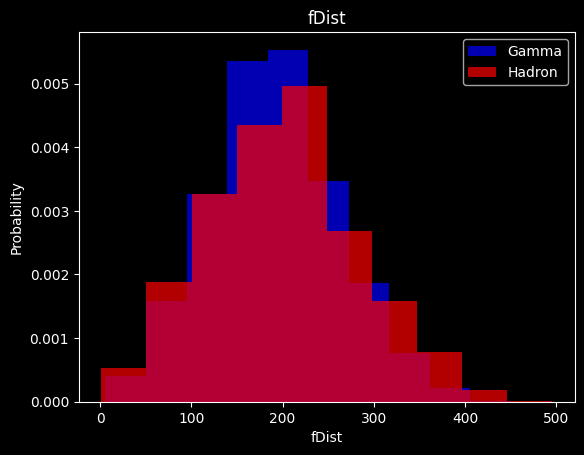

In [29]:
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], color='blue', label='Gamma', alpha=0.7, density=True)
    plt.hist(df[df['class'] == 0][label], color='red', label='Hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [30]:
# Train, validation, test split
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [31]:
def scale_dataset(dataFrame, oversample=False):
    x = dataFrame[dataFrame.columns[:-1]].values
    y = dataFrame[dataFrame.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [32]:
print(len(train[train['class'] == 1])) # gamma
print(len(train[train['class'] == 0])) # hadron

7457
3955


In [33]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid)
test, x_test, y_test = scale_dataset(test)

In [34]:
sum(y_train == 1) # gamma

7457

In [35]:
sum(y_train == 0) # hadron

7457

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [45]:
y_predictions = knn_model.predict(x_test)

In [46]:
y_predictions[:10]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [47]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [48]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1379
           1       0.84      0.87      0.86      2425

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.82      0.81      3804



In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [51]:
y_pred = nb_model.predict(x_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.41      0.53      1379
           1       0.73      0.92      0.81      2425

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804

